# Análisis Estadístico Descriptivo - Consumo Energético

Análisis estadístico descriptivo del consumo energético usando variables como: 'ID_Cliente', 'Sector', 'Consumo_kWh_Mensual', 'Estrato', 'Ciudad', 'Area_m2', 'Factura_Mensual_COP', 'Puede_Pagar_Solar', las cuales fueron previamente preprocesadas a través de limpieza de outliers en Excel usando el método IQR.

*Resumen general* 

Este notebook realiza un análisis estadístico descriptivo de los datos de consumo energético mensual (kWh) a partir de variables como sector, estrato, ciudad, área y capacidad de pago.

**Estructura del análisis:**

1. **Carga y exploración de datos**
   - Carga datos desde un Excel (Paneles_solares_con_outliers.xlsx)
   - Información general del dataset
   - Detección de valores nulos

2. **Estadísticas descriptivas**
   - Estadísticas para variables numéricas (media, mediana, desviación estándar, etc.)
   - Análisis de variables categóricas (frecuencias y distribuciones)

3. **Visualizaciones**
   - Histogramas de distribuciones
   - Matriz de correlación
   - Dashboard interactivo con múltiples visualizaciones

0. Cómo cargar las librerias necesarias para el programa

In [ ]:
# ============================================================================
# IMPORTACIÓN DE LIBRERÍAS NECESARIAS PARA EL PROYECTO
# ============================================================================

# --- LIBRERÍAS PARA MANIPULACIÓN Y ANÁLISIS DE DATOS ---
# pandas: Biblioteca principal para trabajar con DataFrames (tablas de datos)
#         Permite leer Excel, filtrar, transformar y analizar datos fácilmente
import pandas as pd

# numpy: Biblioteca para operaciones matemáticas y numéricas
#        Proporciona arrays multidimensionales y funciones matemáticas eficientes
import numpy as np

# scipy: Biblioteca científica para estadísticas y análisis numérico
#        Proporciona funciones estadísticas avanzadas (KDE, distribuciones, etc.)
from scipy import stats

# --- LIBRERÍAS PARA VISUALIZACIÓN DE DATOS ---
# matplotlib: Biblioteca base para crear gráficos y visualizaciones
#             Permite crear gráficos de líneas, barras, scatter plots, etc.
import matplotlib.pyplot as plt

# seaborn: Biblioteca de visualización estadística basada en matplotlib
#          Proporciona gráficos más atractivos y estadísticos (heatmaps, distribuciones, etc.)
import seaborn as sns

# plotly: Biblioteca para crear gráficos interactivos y dashboards
#         Permite gráficos interactivos que se pueden explorar (zoom, hover, etc.)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- CONFIGURACIÓN DE ADVERTENCIAS ---
# warnings: Controla las advertencias que muestra Python
import warnings
warnings.filterwarnings('ignore')  # Ignora todas las advertencias para que no aparezcan en la salida
# Nota: Esto es útil para tener una salida más limpia, pero en desarrollo es mejor ver las advertencias

# Mensaje de confirmación
print("El script continúa...")

# --- CONFIGURACIÓN DE ESTILOS PARA GRÁFICOS ---
# Establece el estilo visual de los gráficos de matplotlib
plt.style.use('seaborn-v0_8')  # Usa el estilo 'seaborn' para gráficos más atractivos

# Establece la paleta de colores para seaborn
sns.set_palette("husl")  # Paleta de colores "husl" (Hue-Saturation-Lightness) - colores vibrantes y distinguibles

El script continúa...


## 1. Carga de Datos

In [17]:
# ============================================================================
# CARGA DE DATOS DESDE ARCHIVO EXCEL
# ============================================================================

# pd.read_excel(): Lee un archivo Excel y lo convierte en un DataFrame de pandas
# Parámetros:
#   - 'Paneles_solares_con_outliers.xlsx': Nombre del archivo Excel a leer
#   - sheet_name='Datos Limpios': Especifica qué hoja del Excel leer
#                                  (el archivo puede tener múltiples hojas)
# El resultado se guarda en la variable 'df' (DataFrame)
df = pd.read_excel('Paneles_solares_con_outliers.xlsx', sheet_name='Datos Limpios')

# df.shape: Retorna una tupla con (número_de_filas, número_de_columnas)
# Ejemplo: (460, 9) significa 460 filas (registros) y 9 columnas (variables)
print(f"Forma del dataset: {df.shape}")

# df.columns.tolist(): Obtiene los nombres de todas las columnas y los convierte en una lista
# Esto es útil para ver qué variables tenemos disponibles en el dataset
print(f"\nColumnas: {df.columns.tolist()}")

# df.head(): Muestra las primeras 5 filas del DataFrame por defecto
# Útil para hacer una inspección rápida de los datos
# Alternativas:
#   - df.head(10): Muestra las primeras 10 filas
#   - df.tail(): Muestra las últimas 5 filas
#   - df.tail(10): Muestra las últimas 10 filas
df.head()

Forma del dataset: (460, 9)

Columnas: ['ID_Cliente', 'Sector', 'Consumo_kWh_Mensual', 'Estrato', 'Ciudad', 'Area_m2', 'Factura_Mensual_COP', 'Puede_Pagar_Solar', 'Validar']


,ID_Cliente,Sector,Consumo_kWh_Mensual,Estrato,Ciudad,Area_m2,Factura_Mensual_COP,Puede_Pagar_Solar,Validar
0,RES-0001,Residencial,209.802849,4,Planeta Rica,77.234714,130077.766492,No,VALIDO
1,RES-0002,Residencial,108.131614,1,Sahagún,122.833169,67041.600932,No,VALIDO
2,RES-0003,Residencial,196.742478,4,Planeta Rica,100.210306,121980.336070,No,VALIDO
3,RES-0004,Residencial,145.147312,2,Lorica,69.496604,89991.333414,No,VALIDO
4,RES-0005,Residencial,181.333310,3,Lorica,71.444142,112426.651950,No,VALIDO


## 2. Análisis Exploratorio de Datos

In [18]:
# ============================================================================
# INFORMACIÓN GENERAL DEL DATASET
# ============================================================================

# Imprime un título para identificar la sección
print("=== INFORMACIÓN GENERAL ===")

# df.info(): Proporciona un resumen completo del DataFrame
# Muestra:
#   - Número total de filas (entries)
#   - Número de columnas y sus nombres
#   - Cantidad de valores no nulos (Non-Null Count) por columna
#   - Tipo de dato de cada columna (Dtype)
#   - Uso de memoria (memory usage)
print(df.info())

# EXPLICACIÓN DE TIPOS DE DATOS (Dtype):
# ----------------------------------------------------------------------------
# object: Tipo de dato para cadenas de texto (strings) o datos mixtos
#         Ejemplo: 'ID_Cliente', 'Sector', 'Ciudad' son variables categóricas/texto
#
# int64: Entero de 64 bits (números enteros sin decimales)
#        Ejemplo: 'Estrato' (1, 2, 3, 4, 5, 6)
#
# float64: Número decimal de 64 bits (números con punto decimal)
#          Ejemplo: 'Consumo_kWh_Mensual', 'Area_m2', 'Factura_Mensual_COP'
#
# NOTA: Si una columna tiene valores nulos, el Non-Null Count será menor
#        al número total de filas. Esto es importante para detectar datos faltantes.

=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Cliente           460 non-null    object 
 1   Sector               460 non-null    object 
 2   Consumo_kWh_Mensual  456 non-null    float64
 3   Estrato              460 non-null    int64  
 4   Ciudad               460 non-null    object 
 5   Area_m2              460 non-null    float64
 6   Factura_Mensual_COP  456 non-null    float64
 7   Puede_Pagar_Solar    460 non-null    object 
 8   Validar              460 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 32.5+ KB
None


In [19]:
# ============================================================================
# DETECCIÓN DE VALORES NULOS (DATOS FALTANTES)
# ============================================================================

# Imprime un título para identificar la sección
print("\n=== VALORES NULOS ===")

# df.isnull(): Crea un DataFrame booleano donde True indica valores nulos (NaN)
# .sum(): Suma los valores True (1) por columna, dando el total de nulos
# Resultado: Muestra cuántos valores nulos hay en cada columna
print(df.isnull().sum())

# INTERPRETACIÓN DE LOS RESULTADOS:
# ----------------------------------------------------------------------------
# Si el valor es 0: No hay valores nulos en esa columna (datos completos)
# Si el valor > 0: Hay valores nulos que necesitan ser manejados
#                  Ejemplo: Si 'Consumo_kWh_Mensual' tiene 4, significa que
#                           4 registros no tienen valor de consumo
#
# IMPORTANTE: Los valores nulos pueden afectar el entrenamiento del modelo,
#             por lo que deben ser tratados antes de modelar (imputación o eliminación)


=== VALORES NULOS ===
ID_Cliente             0
Sector                 0
Consumo_kWh_Mensual    4
Estrato                0
Ciudad                 0
Area_m2                0
Factura_Mensual_COP    4
Puede_Pagar_Solar      0
Validar                0
dtype: int64


`describe()` en pandas genera estadísticas descriptivas de las columnas numéricas de un DataFrame. Muestra un resumen con:

- count: cantidad de valores no nulos
- mean: promedio
- std: desviación estándar
- min: valor mínimo
- 25%: primer cuartil (Q1)
- 50%: mediana (Q2)
- 75%: tercer cuartil (Q3)
- max: valor máximo

En tu notebook (línea 351), `df.describe()` muestra estas estadísticas para las columnas numéricas como `Consumo_kWh_Mensual`, `Estrato`, `Area_m2` y `Factura_Mensual_COP`.

Ejemplo de salida:
```
       Consumo_kWh_Mensual     Estrato      Area_m2  Factura_Mensual_COP
count           456.000000  460.000000   460.000000         4.560000e+02
mean           2135.094265    4.167391   546.515401         1.323758e+06
std            2424.882968    1.293617   530.660066         1.503427e+06
min              51.248594    1.000000    39.553701         3.177413e+04
25%             222.775573    3.000000    97.470426         1.381209e+05
50%             894.231772    4.000000   299.151220         5.544237e+05
75%            4303.494545    5.000000  1077.565632         2.668167e+06
max            9814.000000    6.000000  1850.420779         6.084680e+06
```

Útil para:
- Entender la distribución de los datos
- Detectar valores atípicos
- Ver el rango y la dispersión de las variables
- Realizar un análisis exploratorio inicial


## 3. Visualizaciones de Variables Numéricas


### 3.1. Distribuciones de Variables Numéricas (Histogramas y Boxplots)


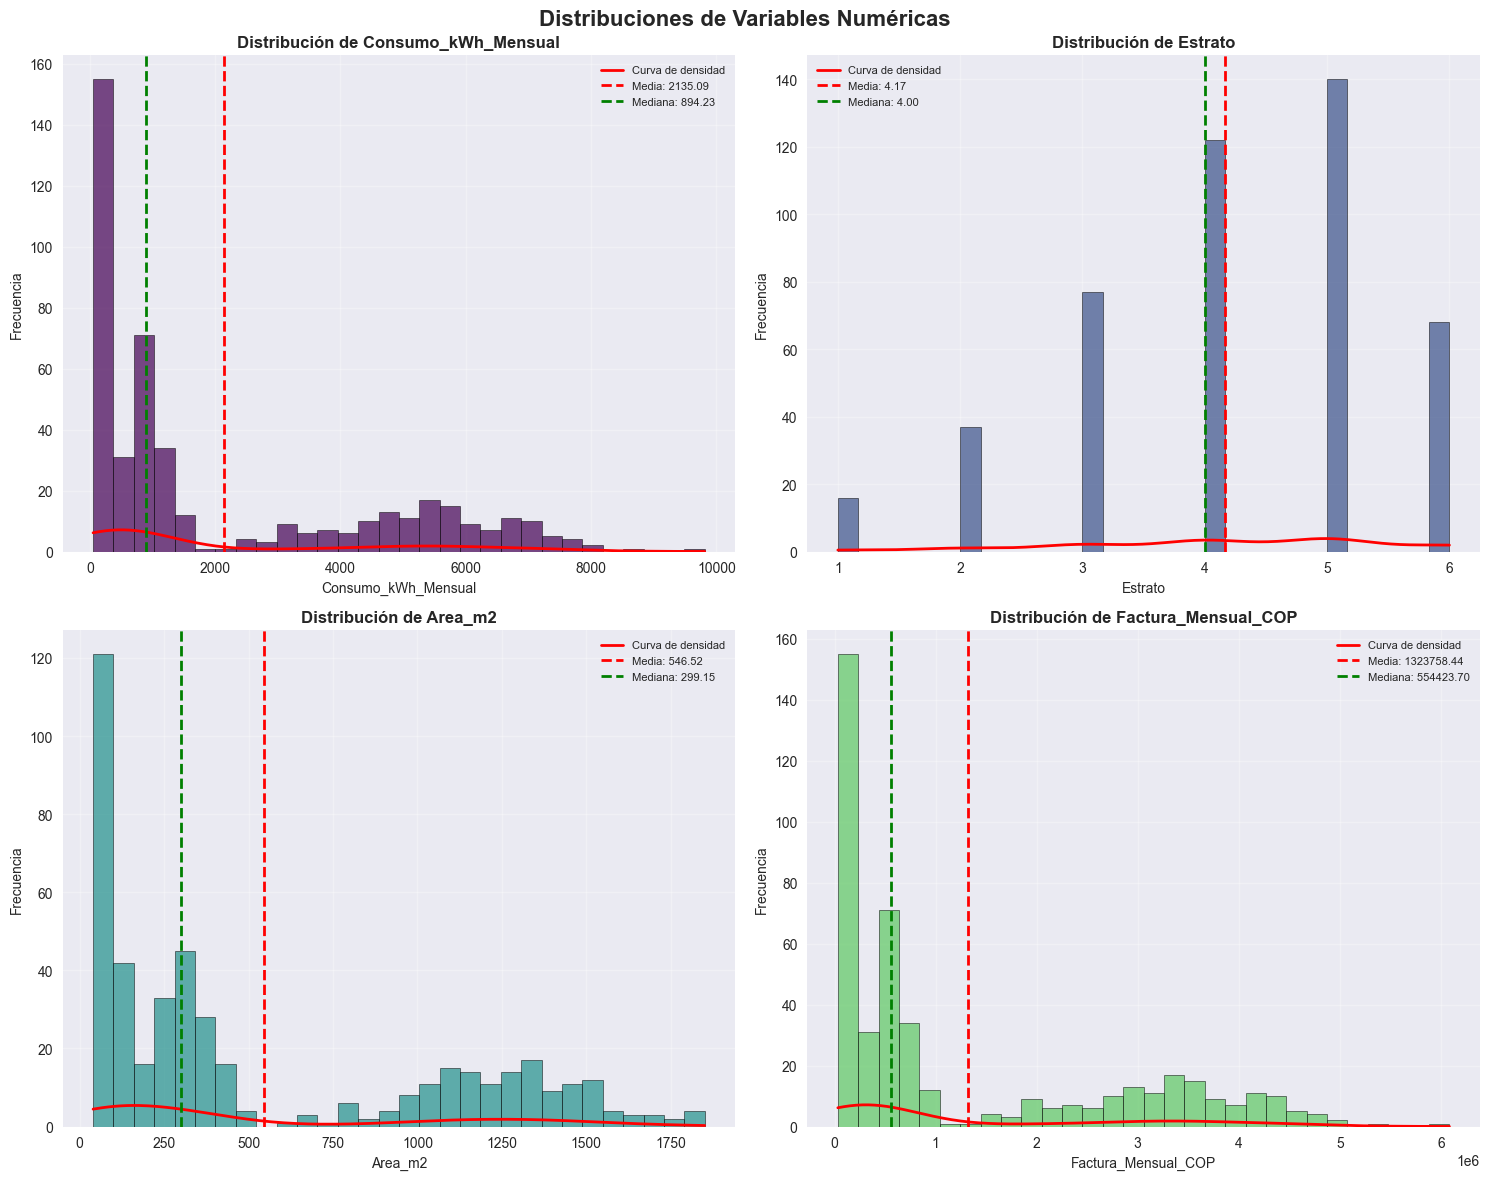

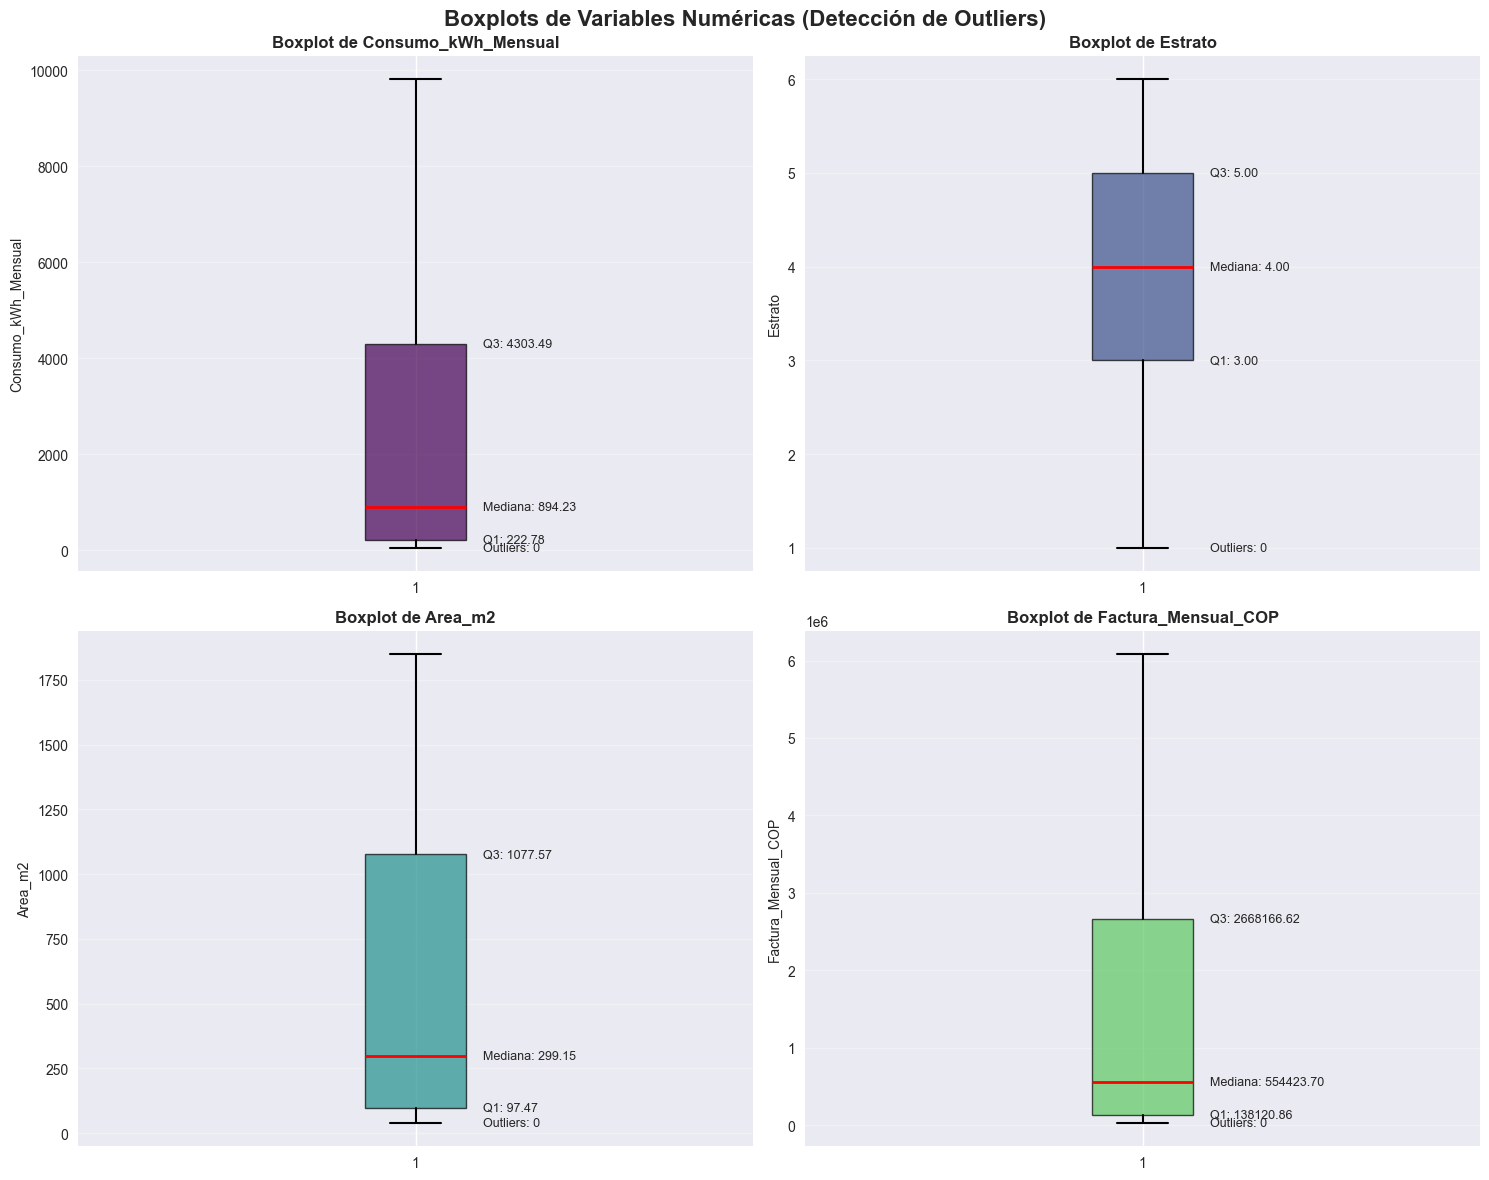

In [20]:
# ============================================================================
# HISTOGRAMAS Y BOXPLOTS DE VARIABLES NUMÉRICAS
# ============================================================================

# Seleccionar solo las variables numéricas para visualización
variables_numericas = ['Consumo_kWh_Mensual', 'Estrato', 'Area_m2', 'Factura_Mensual_COP']

# Crear figura con subplots (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# Crear histogramas para cada variable numérica
for i, var in enumerate(variables_numericas):
    # Filtrar valores nulos
    data_clean = df[var].dropna()
    
    # Crear histograma con curva de densidad (KDE)
    axes[i].hist(data_clean, bins=30, alpha=0.7, color=plt.cm.viridis(i/len(variables_numericas)), 
                 edgecolor='black', linewidth=0.5)
    
    # Agregar línea de densidad (KDE)
    if len(data_clean) > 1:
        density = stats.gaussian_kde(data_clean)
        xs = np.linspace(data_clean.min(), data_clean.max(), 200)
        axes[i].plot(xs, density(xs) * len(data_clean) * (xs[1] - xs[0]), 
                    'r-', linewidth=2, label='Curva de densidad')
    
    # Agregar línea vertical para la media
    mean_val = data_clean.mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                   label=f'Media: {mean_val:.2f}')
    
    # Agregar línea vertical para la mediana
    median_val = data_clean.median()
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, 
                   label=f'Mediana: {median_val:.2f}')
    
    axes[i].set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# BOXPLOTS DE VARIABLES NUMÉRICAS
# ============================================================================

# Crear figura para boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Boxplots de Variables Numéricas (Detección de Outliers)', 
             fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, var in enumerate(variables_numericas):
    data_clean = df[var].dropna()
    
    # Crear boxplot
    bp = axes[i].boxplot(data_clean, patch_artist=True, 
                        boxprops=dict(facecolor=plt.cm.viridis(i/len(variables_numericas)), alpha=0.7),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(linewidth=1.5),
                        capprops=dict(linewidth=1.5))
    
    axes[i].set_title(f'Boxplot de {var}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(var, fontsize=10)
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Agregar estadísticas en el gráfico
    q1 = data_clean.quantile(0.25)
    q3 = data_clean.quantile(0.75)
    iqr = q3 - q1
    outliers = data_clean[(data_clean < q1 - 1.5*iqr) | (data_clean > q3 + 1.5*iqr)]
    
    axes[i].text(1.1, data_clean.median(), f'Mediana: {data_clean.median():.2f}', 
                fontsize=9, verticalalignment='center')
    axes[i].text(1.1, q1, f'Q1: {q1:.2f}', fontsize=9, verticalalignment='center')
    axes[i].text(1.1, q3, f'Q3: {q3:.2f}', fontsize=9, verticalalignment='center')
    axes[i].text(1.1, outliers.min() if len(outliers) > 0 else data_clean.min(), 
                f'Outliers: {len(outliers)}', fontsize=9, verticalalignment='center')

plt.tight_layout()
plt.show()


### 3.2. Matriz de Correlación entre Variables Numéricas


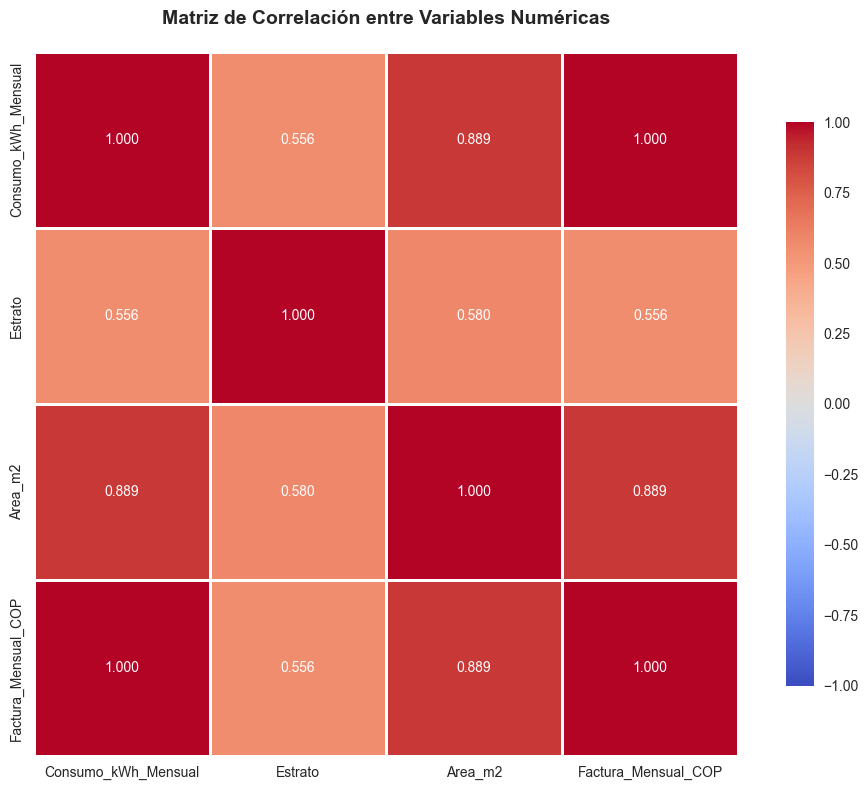


=== MATRIZ DE CORRELACIÓN ===
                     Consumo_kWh_Mensual   Estrato   Area_m2  \
Consumo_kWh_Mensual             1.000000  0.555896  0.888597   
Estrato                         0.555896  1.000000  0.580388   
Area_m2                         0.888597  0.580388  1.000000   
Factura_Mensual_COP             1.000000  0.555896  0.888597   

                     Factura_Mensual_COP  
Consumo_kWh_Mensual             1.000000  
Estrato                         0.555896  
Area_m2                         0.888597  
Factura_Mensual_COP             1.000000  

Interpretación:
- Valores cercanos a 1: Correlación positiva fuerte
- Valores cercanos a -1: Correlación negativa fuerte
- Valores cercanos a 0: Poca o ninguna correlación


In [21]:
# ============================================================================
# MATRIZ DE CORRELACIÓN (HEATMAP)
# ============================================================================

# Seleccionar solo variables numéricas y eliminar filas con valores nulos
df_numerico = df[variables_numericas].dropna()

# Calcular matriz de correlación
correlation_matrix = df_numerico.corr()

# Crear figura con matplotlib y seaborn
fig, ax = plt.subplots(figsize=(10, 8))

# Crear heatmap de correlación
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Matriz de Correlación entre Variables Numéricas', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Imprimir valores de correlación
print("\n=== MATRIZ DE CORRELACIÓN ===")
print(correlation_matrix)
print("\nInterpretación:")
print("- Valores cercanos a 1: Correlación positiva fuerte")
print("- Valores cercanos a -1: Correlación negativa fuerte")
print("- Valores cercanos a 0: Poca o ninguna correlación")


### 3.3. Relaciones entre Variables Numéricas (Scatter Plots)


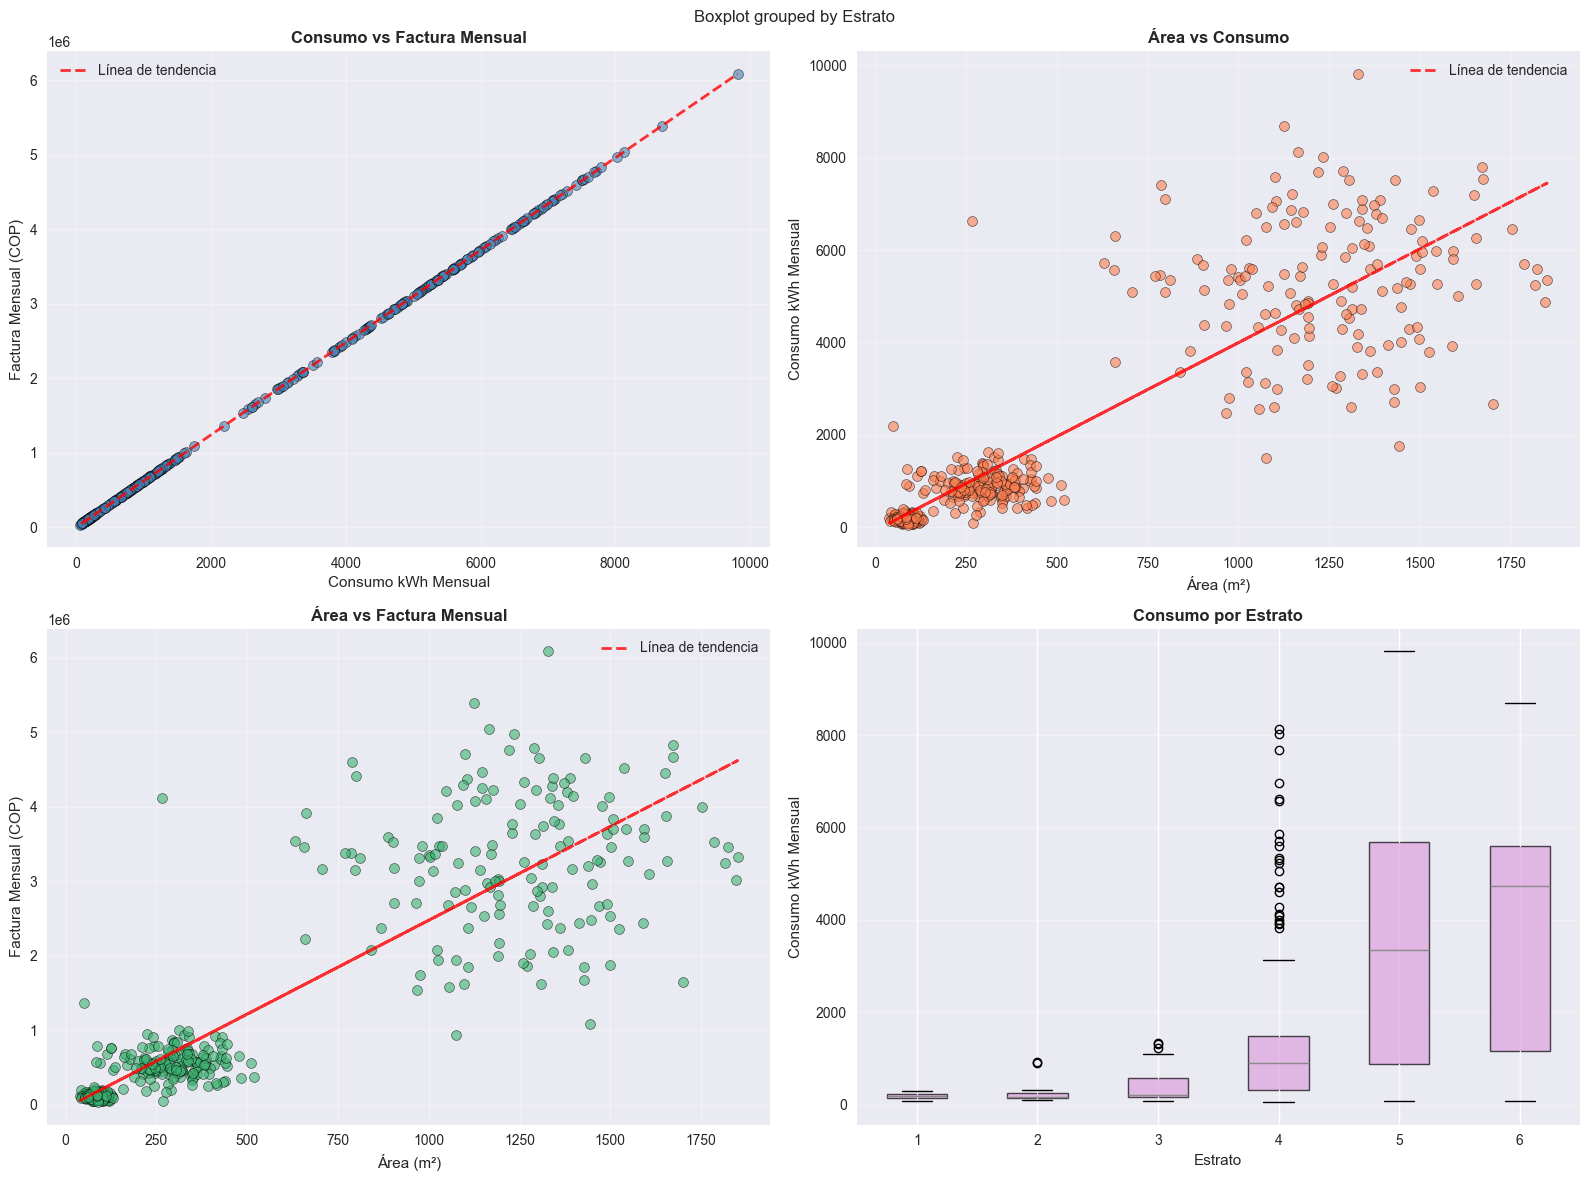

In [22]:
# ============================================================================
# SCATTER PLOTS: RELACIONES ENTRE VARIABLES NUMÉRICAS
# ============================================================================

# Crear figura con múltiples scatter plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Relaciones entre Variables Numéricas', fontsize=16, fontweight='bold')

axes = axes.flatten()

# 1. Consumo vs Factura Mensual
df_clean = df[['Consumo_kWh_Mensual', 'Factura_Mensual_COP']].dropna()
axes[0].scatter(df_clean['Consumo_kWh_Mensual'], df_clean['Factura_Mensual_COP'], 
               alpha=0.6, s=50, color='steelblue', edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Consumo kWh Mensual', fontsize=11)
axes[0].set_ylabel('Factura Mensual (COP)', fontsize=11)
axes[0].set_title('Consumo vs Factura Mensual', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Agregar línea de tendencia
z = np.polyfit(df_clean['Consumo_kWh_Mensual'], df_clean['Factura_Mensual_COP'], 1)
p = np.poly1d(z)
axes[0].plot(df_clean['Consumo_kWh_Mensual'], p(df_clean['Consumo_kWh_Mensual']), 
            "r--", alpha=0.8, linewidth=2, label='Línea de tendencia')
axes[0].legend()

# 2. Consumo vs Área
df_clean = df[['Consumo_kWh_Mensual', 'Area_m2']].dropna()
axes[1].scatter(df_clean['Area_m2'], df_clean['Consumo_kWh_Mensual'], 
               alpha=0.6, s=50, color='coral', edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Área (m²)', fontsize=11)
axes[1].set_ylabel('Consumo kWh Mensual', fontsize=11)
axes[1].set_title('Área vs Consumo', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Línea de tendencia
z = np.polyfit(df_clean['Area_m2'], df_clean['Consumo_kWh_Mensual'], 1)
p = np.poly1d(z)
axes[1].plot(df_clean['Area_m2'], p(df_clean['Area_m2']), 
            "r--", alpha=0.8, linewidth=2, label='Línea de tendencia')
axes[1].legend()

# 3. Factura vs Área
df_clean = df[['Factura_Mensual_COP', 'Area_m2']].dropna()
axes[2].scatter(df_clean['Area_m2'], df_clean['Factura_Mensual_COP'], 
               alpha=0.6, s=50, color='mediumseagreen', edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Área (m²)', fontsize=11)
axes[2].set_ylabel('Factura Mensual (COP)', fontsize=11)
axes[2].set_title('Área vs Factura Mensual', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

# Línea de tendencia
z = np.polyfit(df_clean['Area_m2'], df_clean['Factura_Mensual_COP'], 1)
p = np.poly1d(z)
axes[2].plot(df_clean['Area_m2'], p(df_clean['Area_m2']), 
            "r--", alpha=0.8, linewidth=2, label='Línea de tendencia')
axes[2].legend()

# 4. Consumo vs Estrato (boxplot mejor para variable categórica ordinal)
df_clean = df[['Consumo_kWh_Mensual', 'Estrato']].dropna()
# Crear boxplot agrupado por estrato
df_clean.boxplot(column='Consumo_kWh_Mensual', by='Estrato', ax=axes[3], 
                patch_artist=True, boxprops=dict(facecolor='plum', alpha=0.7))
axes[3].set_xlabel('Estrato', fontsize=11)
axes[3].set_ylabel('Consumo kWh Mensual', fontsize=11)
axes[3].set_title('Consumo por Estrato', fontsize=12, fontweight='bold')
axes[3].grid(True, alpha=0.3, axis='y')
plt.setp(axes[3].get_xticklabels(), fontsize=10)

plt.tight_layout()
plt.show()


### 3.4. Relaciones entre Variables Numéricas y Categóricas


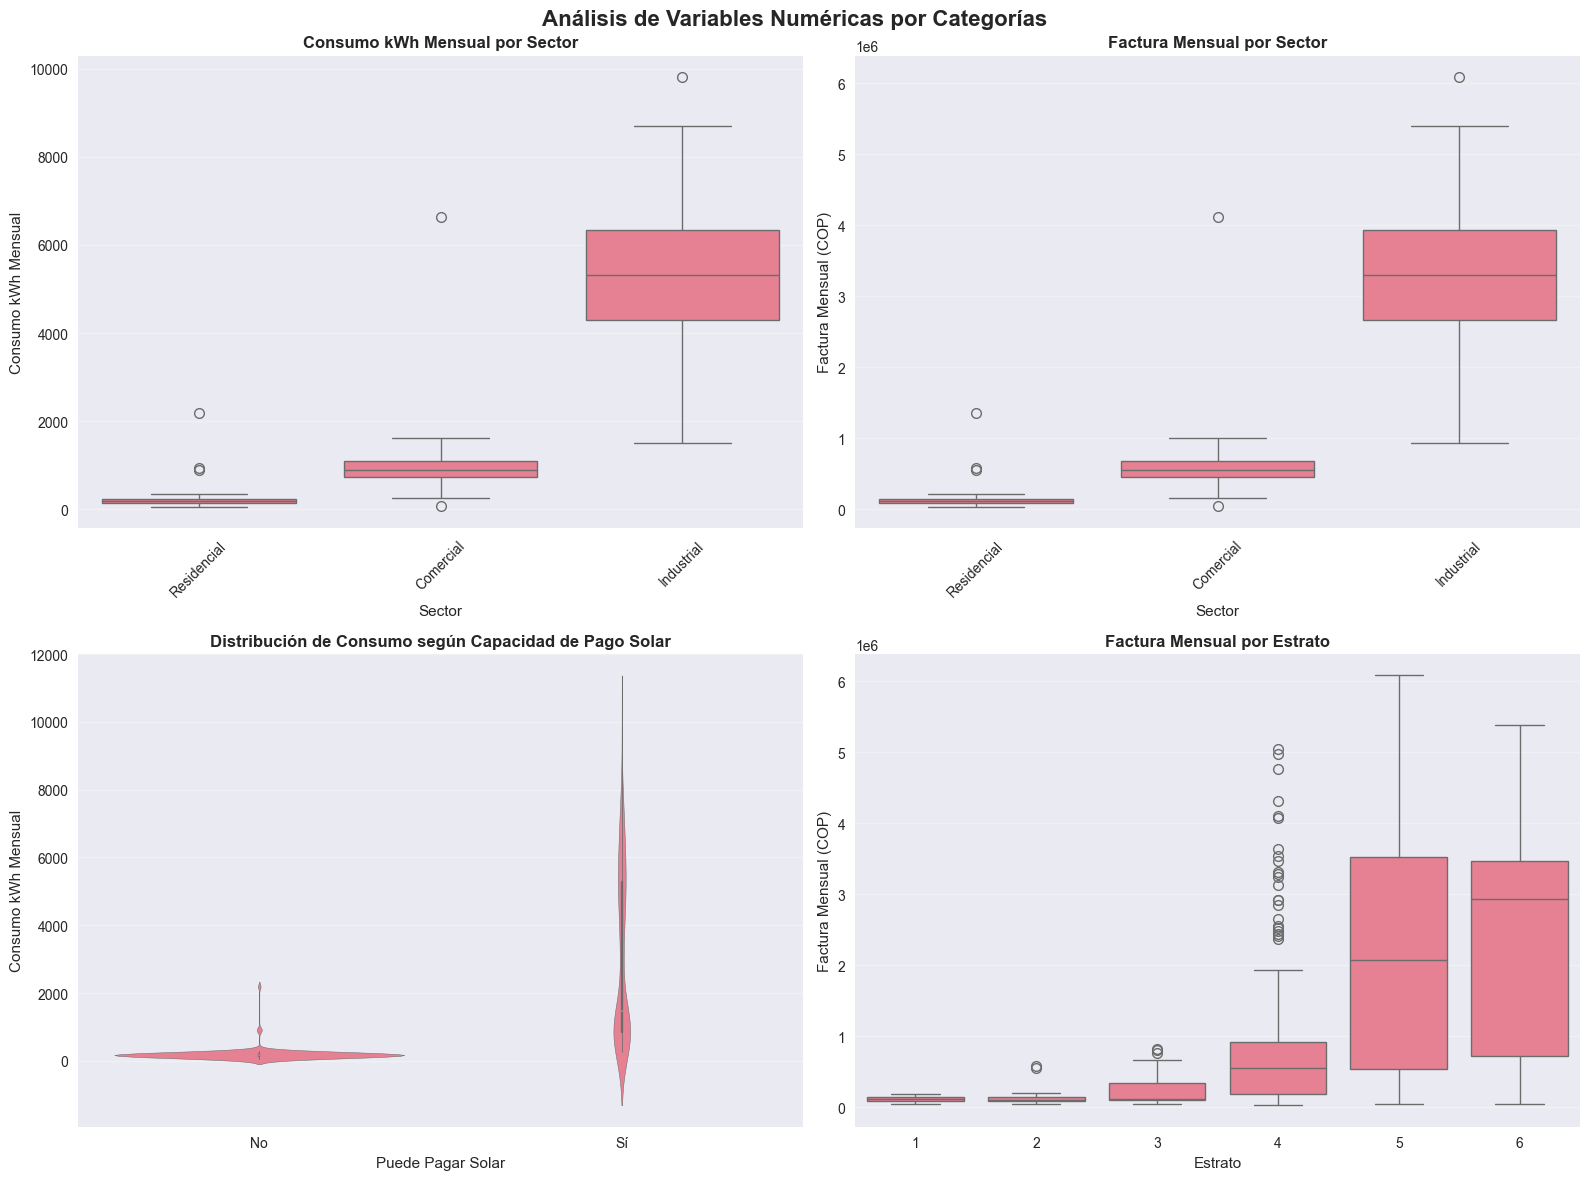

In [23]:
# ============================================================================
# RELACIONES ENTRE VARIABLES NUMÉRICAS Y CATEGÓRICAS
# ============================================================================

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Variables Numéricas por Categorías', 
             fontsize=16, fontweight='bold')

axes = axes.flatten()

# 1. Consumo por Sector
df_clean = df[['Consumo_kWh_Mensual', 'Sector']].dropna()
sns.boxplot(data=df_clean, x='Sector', y='Consumo_kWh_Mensual', ax=axes[0])
axes[0].set_title('Consumo kWh Mensual por Sector', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sector', fontsize=11)
axes[0].set_ylabel('Consumo kWh Mensual', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Factura por Sector
df_clean = df[['Factura_Mensual_COP', 'Sector']].dropna()
sns.boxplot(data=df_clean, x='Sector', y='Factura_Mensual_COP', ax=axes[1])
axes[1].set_title('Factura Mensual por Sector', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sector', fontsize=11)
axes[1].set_ylabel('Factura Mensual (COP)', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Consumo por Capacidad de Pago Solar
df_clean = df[['Consumo_kWh_Mensual', 'Puede_Pagar_Solar']].dropna()
sns.violinplot(data=df_clean, x='Puede_Pagar_Solar', y='Consumo_kWh_Mensual', ax=axes[2])
axes[2].set_title('Distribución de Consumo según Capacidad de Pago Solar', 
                  fontsize=12, fontweight='bold')
axes[2].set_xlabel('Puede Pagar Solar', fontsize=11)
axes[2].set_ylabel('Consumo kWh Mensual', fontsize=11)
axes[2].grid(True, alpha=0.3, axis='y')

# 4. Factura por Estrato
df_clean = df[['Factura_Mensual_COP', 'Estrato']].dropna()
sns.boxplot(data=df_clean, x='Estrato', y='Factura_Mensual_COP', ax=axes[3])
axes[3].set_title('Factura Mensual por Estrato', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Estrato', fontsize=11)
axes[3].set_ylabel('Factura Mensual (COP)', fontsize=11)
axes[3].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### 3.5. Pair Plot (Gráfico de Pares) - Relaciones Múltiples


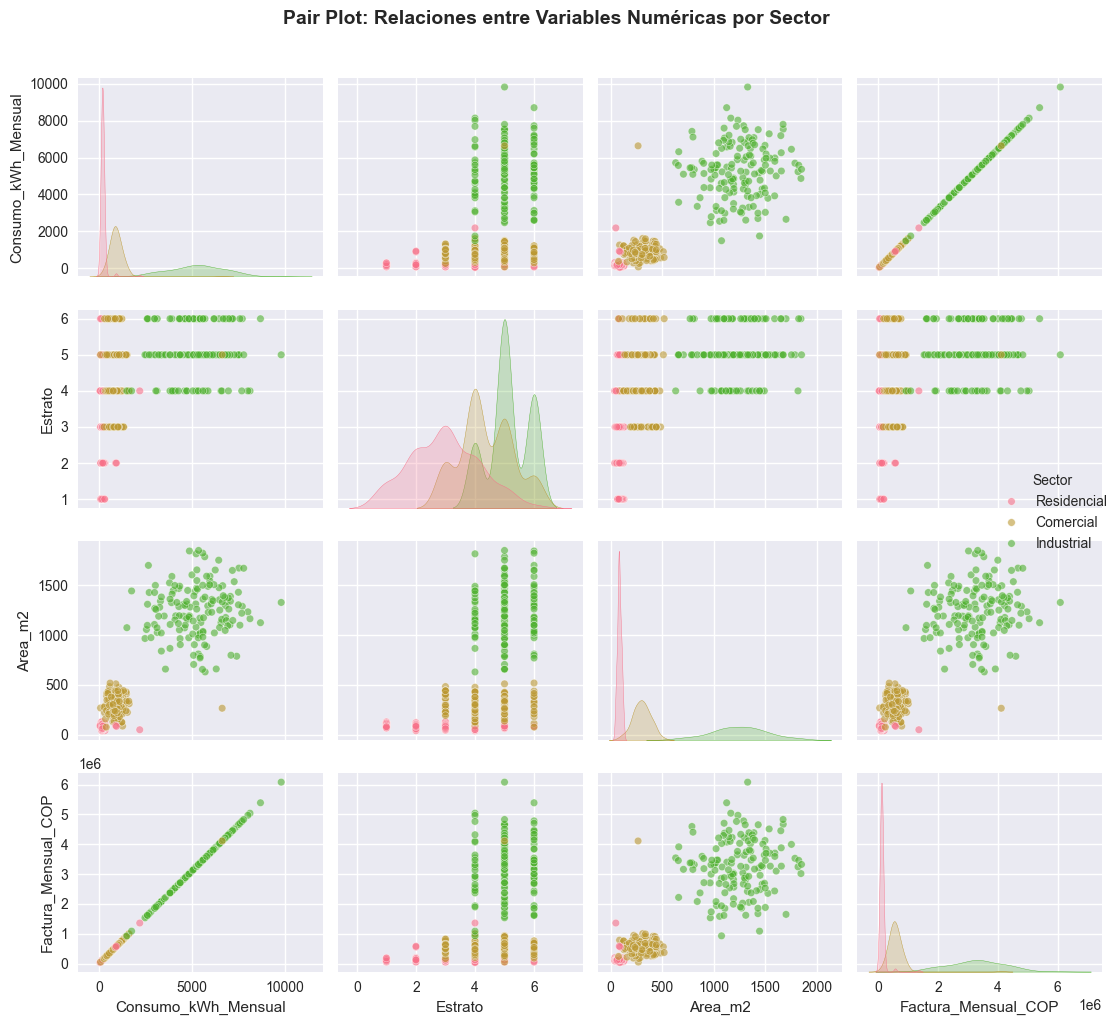

In [24]:
# ============================================================================
# PAIR PLOT: VISUALIZACIÓN DE TODAS LAS RELACIONES PARES
# ============================================================================

# Crear pair plot con seaborn (muestra todas las relaciones entre variables numéricas)
# Incluir variable categórica para colorear los puntos
df_clean = df[variables_numericas + ['Sector']].dropna()

# Crear pair plot
pair_plot = sns.pairplot(df_clean, 
                        vars=variables_numericas, 
                        hue='Sector',
                        diag_kind='kde',  # Usar densidad en la diagonal
                        plot_kws={'alpha': 0.6, 's': 30},
                        height=2.5)

pair_plot.fig.suptitle('Pair Plot: Relaciones entre Variables Numéricas por Sector', 
                       fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### 3.6. Dashboard Interactivo con Plotly


In [25]:
# ============================================================================
# DASHBOARD INTERACTIVO CON PLOTLY
# ============================================================================

# Limpiar datos para plotly
df_plotly = df.dropna(subset=variables_numericas)

# Crear subplots con plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Consumo vs Factura (Interactivo)', 
                   'Consumo por Estrato',
                   'Distribución de Área',
                   'Factura por Sector'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Scatter plot interactivo: Consumo vs Factura
fig.add_trace(
    go.Scatter(
        x=df_plotly['Consumo_kWh_Mensual'],
        y=df_plotly['Factura_Mensual_COP'],
        mode='markers',
        marker=dict(
            size=8,
            color=df_plotly['Estrato'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Estrato", x=1.02),
            line=dict(width=0.5, color='black')
        ),
        text=df_plotly['Sector'],
        hovertemplate='<b>Consumo:</b> %{x:.2f} kWh<br>' +
                      '<b>Factura:</b> %{y:,.0f} COP<br>' +
                      '<b>Sector:</b> %{text}<br>' +
                      '<extra></extra>',
        name='Consumo vs Factura'
    ),
    row=1, col=1
)

# 2. Boxplot: Consumo por Estrato
for estrato in sorted(df_plotly['Estrato'].unique()):
    data_estrato = df_plotly[df_plotly['Estrato'] == estrato]['Consumo_kWh_Mensual']
    fig.add_trace(
        go.Box(
            y=data_estrato,
            name=f'Estrato {estrato}',
            boxmean='sd',
            marker_color=px.colors.qualitative.Set3[int(estrato)-1]
        ),
        row=1, col=2
    )

# 3. Histograma: Distribución de Área
fig.add_trace(
    go.Histogram(
        x=df_plotly['Area_m2'],
        nbinsx=30,
        marker_color='lightblue',
        marker_line_color='black',
        marker_line_width=1,
        name='Distribución de Área'
    ),
    row=2, col=1
)

# 4. Boxplot: Factura por Sector
for sector in df_plotly['Sector'].unique():
    data_sector = df_plotly[df_plotly['Sector'] == sector]['Factura_Mensual_COP']
    fig.add_trace(
        go.Box(
            y=data_sector,
            name=sector,
            boxmean='sd'
        ),
        row=2, col=2
    )

# Actualizar layout
fig.update_layout(
    height=900,
    title_text="Dashboard Interactivo - Análisis de Consumo Energético",
    title_x=0.5,
    title_font_size=18,
    showlegend=True
)

# Actualizar ejes
fig.update_xaxes(title_text="Consumo kWh Mensual", row=1, col=1)
fig.update_yaxes(title_text="Factura Mensual (COP)", row=1, col=1)
fig.update_yaxes(title_text="Consumo kWh Mensual", row=1, col=2)
fig.update_xaxes(title_text="Área (m²)", row=2, col=1)
fig.update_yaxes(title_text="Frecuencia", row=2, col=1)
fig.update_yaxes(title_text="Factura Mensual (COP)", row=2, col=2)

fig.show()


### 3.7. Análisis de Correlación con Scatter Matrix Interactivo


In [26]:
# ============================================================================
# SCATTER MATRIX INTERACTIVO CON PLOTLY
# ============================================================================

# Crear scatter matrix interactivo con plotly express
fig = px.scatter_matrix(
    df_plotly,
    dimensions=variables_numericas,
    color='Sector',
    symbol='Puede_Pagar_Solar',
    title='Scatter Matrix Interactivo - Relaciones entre Variables Numéricas',
    labels={col: col.replace('_', ' ') for col in variables_numericas},
    hover_data=['Ciudad', 'Estrato'],
    width=1200,
    height=1200
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title_x=0.5,
    title_font_size=16
)

fig.show()


### 3.8. Heatmap de Correlación Interactivo


In [27]:
# ============================================================================
# HEATMAP DE CORRELACIÓN INTERACTIVO CON PLOTLY
# ============================================================================

# Calcular matriz de correlación
corr_matrix = df_plotly[variables_numericas].corr()

# Crear heatmap interactivo
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=corr_matrix.values.round(3),
    texttemplate='%{text}',
    textfont={"size": 12},
    colorbar=dict(title="Correlación")
))

fig.update_layout(
    title='Matriz de Correlación Interactiva entre Variables Numéricas',
    title_x=0.5,
    title_font_size=16,
    width=700,
    height=600,
    xaxis_title="Variables",
    yaxis_title="Variables"
)

fig.show()

# Mostrar valores de correlación en formato tabla
print("\n=== VALORES DE CORRELACIÓN ===")
print(corr_matrix.round(3))



=== VALORES DE CORRELACIÓN ===
                     Consumo_kWh_Mensual  Estrato  Area_m2  \
Consumo_kWh_Mensual                1.000    0.556    0.889   
Estrato                            0.556    1.000    0.580   
Area_m2                            0.889    0.580    1.000   
Factura_Mensual_COP                1.000    0.556    0.889   

                     Factura_Mensual_COP  
Consumo_kWh_Mensual                1.000  
Estrato                            0.556  
Area_m2                            0.889  
Factura_Mensual_COP                1.000  


### 3.9. Análisis de Distribuciones por Categorías (Violin Plots)


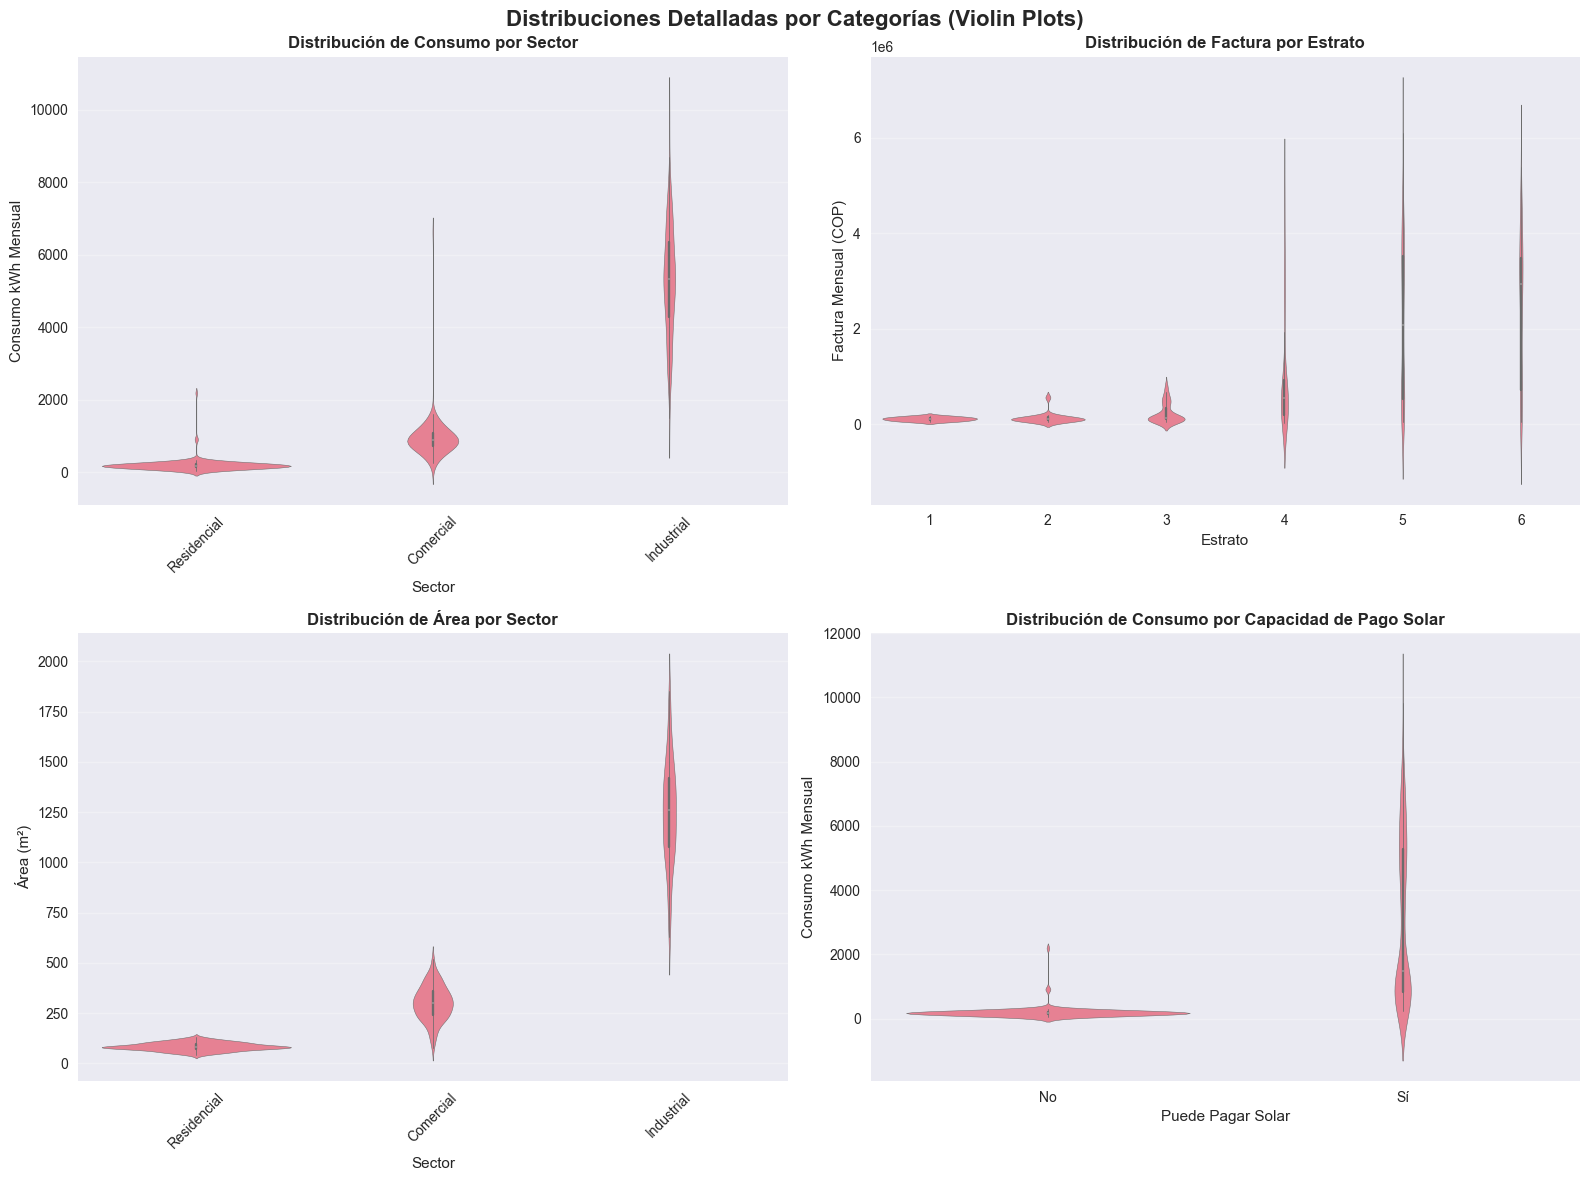

In [28]:
# ============================================================================
# VIOLIN PLOTS: DISTRIBUCIONES DETALLADAS POR CATEGORÍAS
# ============================================================================

# Crear figura con múltiples violin plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribuciones Detalladas por Categorías (Violin Plots)', 
             fontsize=16, fontweight='bold')

axes = axes.flatten()

# 1. Consumo por Sector
df_clean = df[['Consumo_kWh_Mensual', 'Sector']].dropna()
sns.violinplot(data=df_clean, x='Sector', y='Consumo_kWh_Mensual', ax=axes[0], inner='box')
axes[0].set_title('Distribución de Consumo por Sector', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sector', fontsize=11)
axes[0].set_ylabel('Consumo kWh Mensual', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Factura por Estrato
df_clean = df[['Factura_Mensual_COP', 'Estrato']].dropna()
sns.violinplot(data=df_clean, x='Estrato', y='Factura_Mensual_COP', ax=axes[1], inner='box')
axes[1].set_title('Distribución de Factura por Estrato', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Estrato', fontsize=11)
axes[1].set_ylabel('Factura Mensual (COP)', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Área por Sector
df_clean = df[['Area_m2', 'Sector']].dropna()
sns.violinplot(data=df_clean, x='Sector', y='Area_m2', ax=axes[2], inner='box')
axes[2].set_title('Distribución de Área por Sector', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Sector', fontsize=11)
axes[2].set_ylabel('Área (m²)', fontsize=11)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

# 4. Consumo por Capacidad de Pago Solar
df_clean = df[['Consumo_kWh_Mensual', 'Puede_Pagar_Solar']].dropna()
sns.violinplot(data=df_clean, x='Puede_Pagar_Solar', y='Consumo_kWh_Mensual', ax=axes[3], inner='box')
axes[3].set_title('Distribución de Consumo por Capacidad de Pago Solar', 
                  fontsize=12, fontweight='bold')
axes[3].set_xlabel('Puede Pagar Solar', fontsize=11)
axes[3].set_ylabel('Consumo kWh Mensual', fontsize=11)
axes[3].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### 3.10. Resumen Visual: Estadísticas por Categorías


=== ESTADÍSTICAS AGRUPADAS POR SECTOR ===
            Consumo_kWh_Mensual                   Estrato               \
                           mean   median      std    mean median   std   
Sector                                                                   
Comercial                932.45   882.92   550.97    4.38    4.0  0.88   
Industrial              5272.79  5323.29  1499.23    5.14    5.0  0.69   
Residencial              204.83   181.33   191.32    2.98    3.0  1.16   

             Area_m2                  Factura_Mensual_COP              \
                mean   median     std                mean      median   
Sector                                                                  
Comercial     301.50   298.57   86.68           578119.21   547410.27   
Industrial   1244.90  1258.53  260.30          3269130.53  3300439.87   
Residencial    83.83    82.28   19.78           126993.52   112426.65   

                        
                   std  
Sector                  

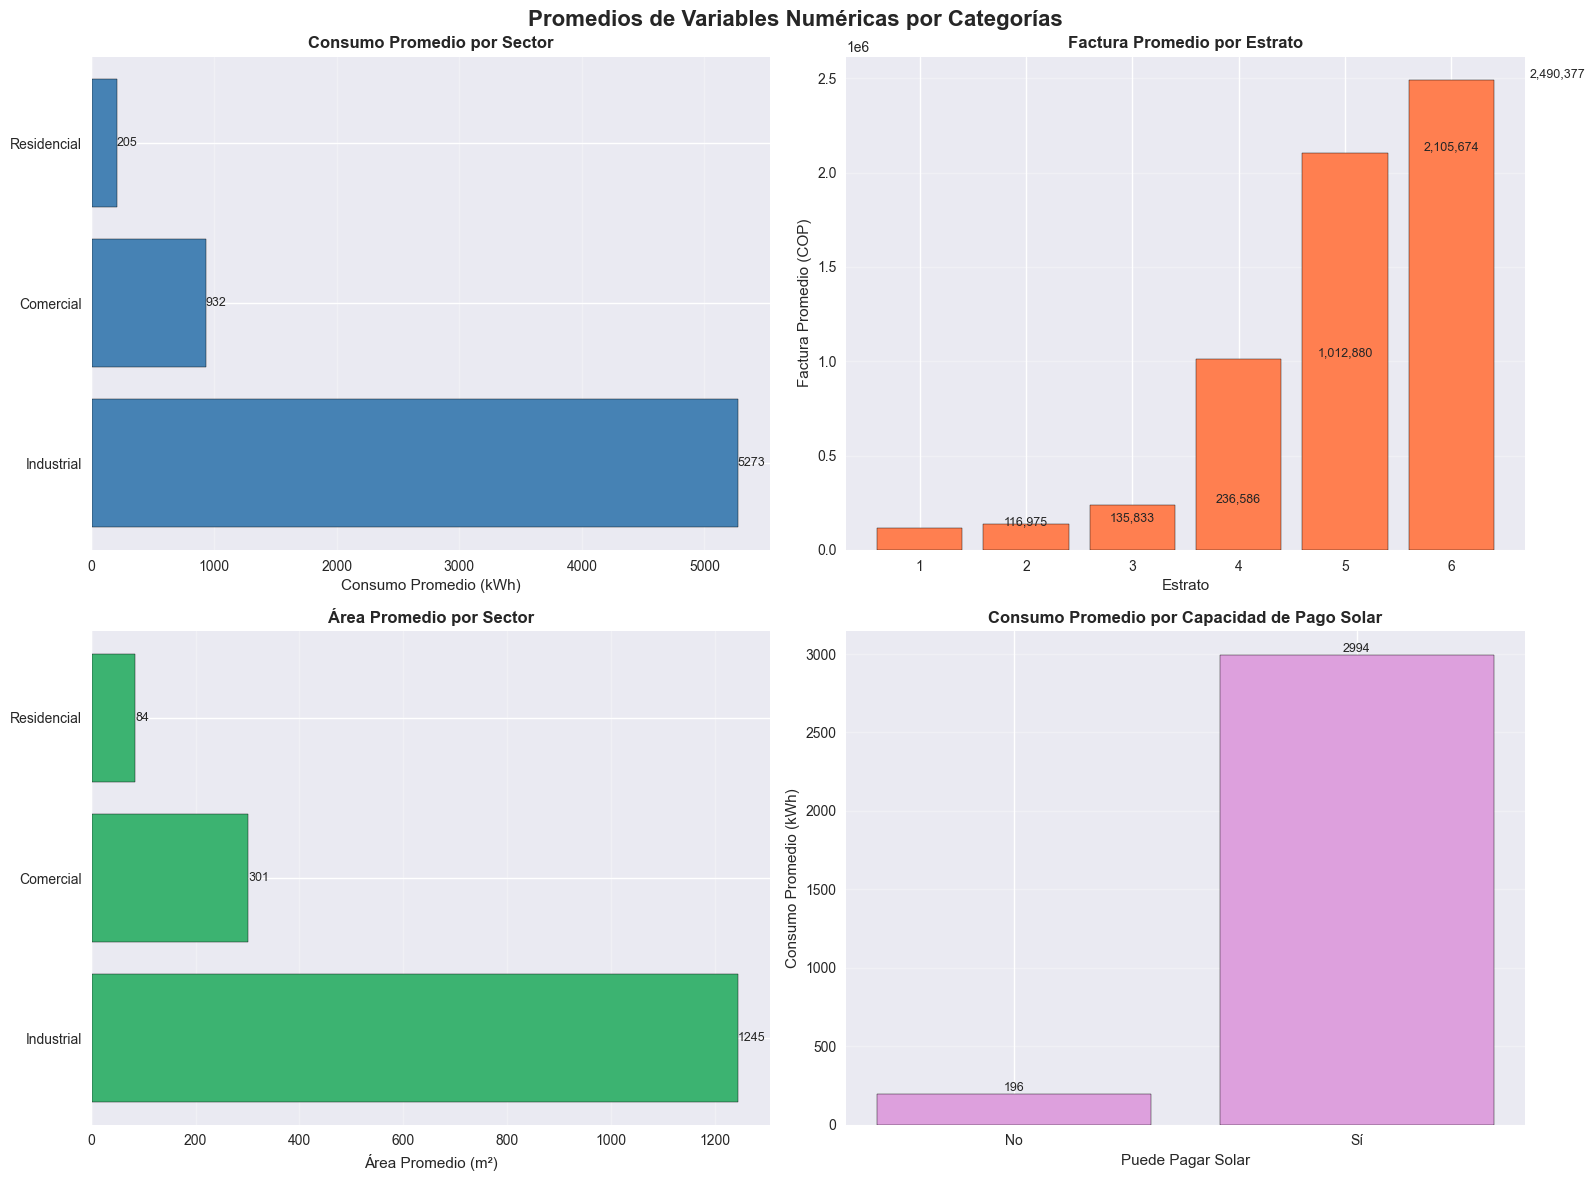

In [29]:
# ============================================================================
# RESUMEN VISUAL: ESTADÍSTICAS AGRUPADAS POR CATEGORÍAS
# ============================================================================

# Calcular estadísticas agrupadas
print("=== ESTADÍSTICAS AGRUPADAS POR SECTOR ===")
stats_sector = df.groupby('Sector')[variables_numericas].agg(['mean', 'median', 'std'])
print(stats_sector.round(2))

print("\n=== ESTADÍSTICAS AGRUPADAS POR ESTRATO ===")
stats_estrato = df.groupby('Estrato')[variables_numericas].agg(['mean', 'median', 'std'])
print(stats_estrato.round(2))

print("\n=== ESTADÍSTICAS AGRUPADAS POR CAPACIDAD DE PAGO SOLAR ===")
stats_pago = df.groupby('Puede_Pagar_Solar')[variables_numericas].agg(['mean', 'median', 'std'])
print(stats_pago.round(2))

# Visualizar medias por categorías
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Promedios de Variables Numéricas por Categorías', 
             fontsize=16, fontweight='bold')

axes = axes.flatten()

# 1. Consumo promedio por Sector
consumo_sector = df.groupby('Sector')['Consumo_kWh_Mensual'].mean().sort_values(ascending=False)
axes[0].barh(consumo_sector.index, consumo_sector.values, color='steelblue', edgecolor='black')
axes[0].set_title('Consumo Promedio por Sector', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Consumo Promedio (kWh)', fontsize=11)
axes[0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(consumo_sector.values):
    axes[0].text(v, i, f'{v:.0f}', va='center', fontsize=9)

# 2. Factura promedio por Estrato
factura_estrato = df.groupby('Estrato')['Factura_Mensual_COP'].mean().sort_index()
axes[1].bar(factura_estrato.index.astype(str), factura_estrato.values, 
           color='coral', edgecolor='black')
axes[1].set_title('Factura Promedio por Estrato', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Estrato', fontsize=11)
axes[1].set_ylabel('Factura Promedio (COP)', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(factura_estrato.values):
    axes[1].text(i+1, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

# 3. Área promedio por Sector
area_sector = df.groupby('Sector')['Area_m2'].mean().sort_values(ascending=False)
axes[2].barh(area_sector.index, area_sector.values, color='mediumseagreen', edgecolor='black')
axes[2].set_title('Área Promedio por Sector', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Área Promedio (m²)', fontsize=11)
axes[2].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(area_sector.values):
    axes[2].text(v, i, f'{v:.0f}', va='center', fontsize=9)

# 4. Consumo promedio por Capacidad de Pago
consumo_pago = df.groupby('Puede_Pagar_Solar')['Consumo_kWh_Mensual'].mean()
axes[3].bar(consumo_pago.index, consumo_pago.values, color='plum', edgecolor='black')
axes[3].set_title('Consumo Promedio por Capacidad de Pago Solar', 
                 fontsize=12, fontweight='bold')
axes[3].set_xlabel('Puede Pagar Solar', fontsize=11)
axes[3].set_ylabel('Consumo Promedio (kWh)', fontsize=11)
axes[3].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(consumo_pago.values):
    axes[3].text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [30]:
# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES NUMÉRICAS
# ============================================================================

# Imprime un título para identificar la sección
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")

# df.describe(): Genera estadísticas descriptivas para todas las columnas numéricas
# Incluye:
#   - count: Cantidad de valores no nulos
#   - mean: Promedio (media aritmética)
#   - std: Desviación estándar (mide la dispersión de los datos)
#   - min: Valor mínimo
#   - 25%: Primer cuartil (Q1) - 25% de los datos están por debajo de este valor
#   - 50%: Mediana (Q2) - 50% de los datos están por debajo, 50% por encima
#   - 75%: Tercer cuartil (Q3) - 75% de los datos están por debajo de este valor
#   - max: Valor máximo
#
# Útil para:
#   - Entender la distribución de cada variable
#   - Detectar valores atípicos (outliers)
#   - Ver el rango y la variabilidad de los datos
#   - Identificar posibles problemas de escala entre variables
print(df.describe())


=== ESTADÍSTICAS DESCRIPTIVAS ===
       Consumo_kWh_Mensual     Estrato      Area_m2  Factura_Mensual_COP
count           456.000000  460.000000   460.000000         4.560000e+02
mean           2135.094265    4.167391   546.515401         1.323758e+06
std            2424.882968    1.293617   530.660066         1.503427e+06
min              51.248594    1.000000    39.553701         3.177413e+04
25%             222.775573    3.000000    97.470426         1.381209e+05
50%             894.231772    4.000000   299.151220         5.544237e+05
75%            4303.494545    5.000000  1077.565632         2.668167e+06
max            9814.000000    6.000000  1850.420779         6.084680e+06
